# Exploring the Julia Set in Julia

In [24]:
const maxiter = 100

function julia(z, c)
    for n = 1:maxiter
        abs2(z) > 4 && return n-1
        z = z*z + c
    end
    return maxiter
end

julia (generic function with 1 method)

In [29]:
julia(-0.06 + .5im, -0.02 + .66im)

70

In [32]:
julia(1, 0.5)

2

In [33]:
julia("foo", "bar")

LoadError: [91mMethodError: no method matching abs2(::String)[0m
Closest candidates are:
  abs2([91m::Bool[39m) at bool.jl:78
  abs2([91m::Missings.Missing[39m) at /Users/stefan/.julia/v0.6/Missings/src/Missings.jl:92
  abs2([91m::Real[39m) at number.jl:89
  ...[39m

In [34]:
[julia(r + i*im, -0.06 + .665im) for r=-1:.002:1, i=-0.5:.002:0.5]

1001×501 Array{Int64,2}:
  2   2   2   2   2    2    2    2    2  …   71   37   35  35  34  33  33  33
  2   2   2   2   2    2    2    2    2     100   38   36  35  34  33  33  32
  2   2   2   2   2    2    2    2    2      76  100  100  36  33  33  32  32
  2   2   2   2   2    2    2    2    2      56  100   45  34  33  32  32  32
  2   2   2   2   2    2    2    2    2      61   67   36  34  32  32  32  31
  2   2   2   2   2    2    2    2    2  …   89  100   35  33  32  32  31  31
  2   2   2   2   2    2    2    2    2     100   44   73  34  32  31  31  31
  2   2   2   2   2    2    2    2    2      56   91   54  58  31  31  30  30
  2   2   2   2   2    2    2    2    2      61   42   35  31  30  30  30  30
  2   2   2   2   2    2    2    2    2      67   33   31  30  29  29  29  30
  2   2   2   2   2    2    2    2    2  …   66   35   30  29  29  29  29  29
  2   2   2   2   2    2    2    2    2      64   58   29  28  28  28  29  29
  2   2   2   2   2    2    2    2    2

In [35]:
@code_native julia(-0.02 + .7im, -0.06 + .665im)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[24]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 4
	vmovsd	(%rdi), %xmm1           ## xmm1 = mem[0],zero
	vmovsd	8(%rdi), %xmm3          ## xmm3 = mem[0],zero
Source line: 6
	vmovsd	(%rsi), %xmm0           ## xmm0 = mem[0],zero
	vmovsd	8(%rsi), %xmm2          ## xmm2 = mem[0],zero
	xorl	%eax, %eax
	movabsq	$4814217744, %rcx       ## imm = 0x11EF32210
	vmovsd	(%rcx), %xmm4           ## xmm4 = mem[0],zero
	nopw	%cs:(%rax,%rax)
Source line: 5
L48:
	vmulsd	%xmm1, %xmm1, %xmm5
	vmulsd	%xmm3, %xmm3, %xmm6
	vaddsd	%xmm5, %xmm6, %xmm7
	vucomisd	%xmm4, %xmm7
	ja	L103
Source line: 6
	vsubsd	%xmm6, %xmm5, %xmm5
	vmulsd	%xmm1, %xmm3, %xmm1
	vaddsd	%xmm1, %xmm1, %xmm3
	vaddsd	%xmm0, %xmm5, %xmm1
	vaddsd	%xmm2, %xmm3, %xmm3
Source line: 4
	addq	$1, %rax
	cmpq	$100, %rax
	jne	L48
Source line: 8
	movl	$100, %eax
	popq	%rbp
	retq
Source line: 5
L103:
	popq	%rbp
	retq
	nopl	(%rax)


In [37]:
@code_native julia(1, 2)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[24]
	pushq	%rbp
	movq	%rsp, %rbp
	xorl	%eax, %eax
	nopw	%cs:(%rax,%rax)
Source line: 5
L16:
	imulq	%rdi, %rdi
	cmpq	$5, %rdi
	jge	L46
Source line: 6
	addq	%rsi, %rdi
Source line: 4
	addq	$1, %rax
	cmpq	$100, %rax
	jne	L16
Source line: 8
	movl	$100, %eax
	popq	%rbp
	retq
Source line: 5
L46:
	popq	%rbp
	retq


In [39]:
using Colors, Images, ImageMagick, QuartzImageIO

In [42]:
const cmap = convert(Vector{RGB{N0f8}}, colormap("RdBu", 100))

In [43]:
typeof(ans)

Array{ColorTypes.RGB{FixedPointNumbers.Normed{UInt8,8}},1}

In [44]:
px = cmap[75]

In [45]:
dump(px)

ColorTypes.RGB{FixedPointNumbers.Normed{UInt8,8}}
  r: FixedPointNumbers.Normed{UInt8,8}
    i: UInt8 118
  g: FixedPointNumbers.Normed{UInt8,8}
    i: UInt8 180
  b: FixedPointNumbers.Normed{UInt8,8}
    i: UInt8 232


In [46]:
px.r

0.463N0f8

In [47]:
px.r + px.b

0.369N0f8

In [48]:
max(px.r, px.b)

0.91N0f8

In [49]:
@code_native px.r + px.b

	.section	__TEXT,__text,regular,pure_instructions
Filename: normed.jl
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 93
	movb	(%rsi), %al
	addb	(%rdi), %al
	popq	%rbp
	retq
	nopw	(%rax,%rax)


In [50]:
@which px.r + px.b

+(x::FixedPointNumbers.Normed{T,f}, y::FixedPointNumbers.Normed{T,f}) where {T, f} in FixedPointNumbers at /Users/stefan/.julia/v0.6/FixedPointNumbers/src/normed.jl:93

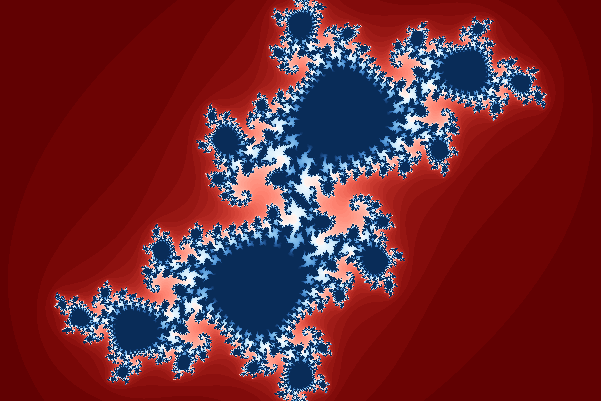

In [54]:
ImageMeta([cmap[julia(r + i*im, -0.05 + .65im)] for i=-1:.005:1, r=-1.5:.005:1.5])

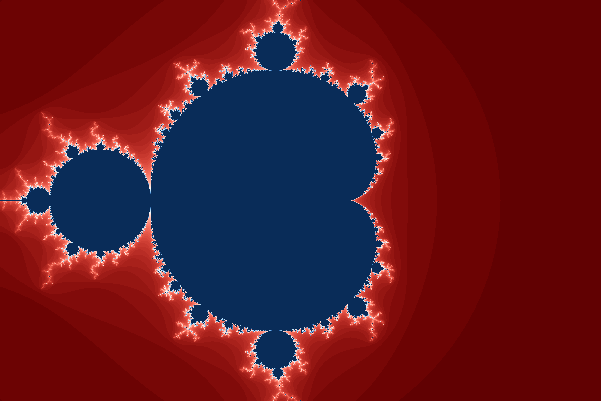

In [55]:
img = ImageMeta([cmap[julia(r + i*im, r + i*im)] for i=-1:.005:1, r=-1.5:.005:1.5])

In [56]:
using Interact

Interact.Options{:SelectionSlider,Float64}(19: "input-7" = 0.0 Float64 , "r′", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-0.1"=>-0.1,"-0.09"=>-0.09,"-0.08"=>-0.08,"-0.07"=>-0.07,"-0.06"=>-0.06,"-0.05"=>-0.05,"-0.04"=>-0.04,"-0.03"=>-0.03,"-0.02"=>-0.02,"-0.01"=>-0.01…), Dict(0.04=>"0.04",-0.03=>"-0.03",0.09=>"0.09",0.08=>"0.08",0.0=>"0.0",-0.04=>"-0.04",-0.07=>"-0.07",0.01=>"0.01",0.07=>"0.07",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(21: "input-8" = 0.75 Float64 , "i′", 0.75, "0.75", 11, Interact.OptionDict(DataStructures.OrderedDict("0.65"=>0.65,"0.66"=>0.66,"0.67"=>0.67,"0.68"=>0.68,"0.69"=>0.69,"0.7"=>0.7,"0.71"=>0.71,"0.72"=>0.72,"0.73"=>0.73,"0.74"=>0.74…), Dict(0.74=>"0.74",0.72=>"0.72",0.66=>"0.66",0.84=>"0.84",0.7=>"0.7",0.68=>"0.68",0.76=>"0.76",0.78=>"0.78",0.85=>"0.85",0.65=>"0.65"…)), Any[], Any[], true, "horizontal", true)

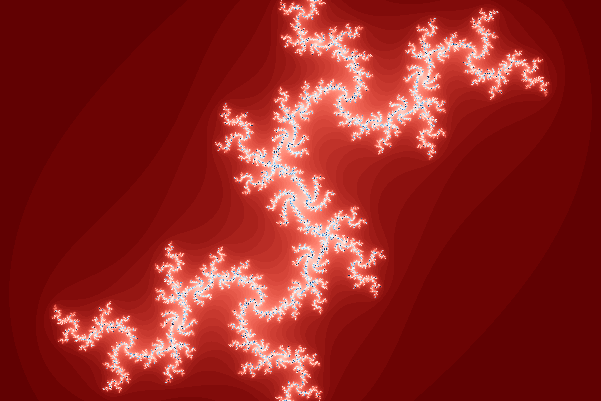

In [57]:
@manipulate for r′ = -0.1:0.01:0.1, i′ = 0.65:0.01:0.85
    ImageMeta([cmap[julia(r + i*im, r′ + i′*im)] for i=-1:.005:1, r=-1.5:.005:1.5])
end

Interact.Options{:SelectionSlider,Float64}(25: "input-9" = 0.75 Float64 , "i′", 0.75, "0.75", 11, Interact.OptionDict(DataStructures.OrderedDict("0.65"=>0.65,"0.66"=>0.66,"0.67"=>0.67,"0.68"=>0.68,"0.69"=>0.69,"0.7"=>0.7,"0.71"=>0.71,"0.72"=>0.72,"0.73"=>0.73,"0.74"=>0.74…), Dict(0.74=>"0.74",0.72=>"0.72",0.66=>"0.66",0.84=>"0.84",0.7=>"0.7",0.68=>"0.68",0.76=>"0.76",0.78=>"0.78",0.85=>"0.85",0.65=>"0.65"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(27: "input-10" = 0.0 Float64 , "r′", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-0.1"=>-0.1,"-0.09"=>-0.09,"-0.08"=>-0.08,"-0.07"=>-0.07,"-0.06"=>-0.06,"-0.05"=>-0.05,"-0.04"=>-0.04,"-0.03"=>-0.03,"-0.02"=>-0.02,"-0.01"=>-0.01…), Dict(0.04=>"0.04",-0.03=>"-0.03",0.09=>"0.09",0.08=>"0.08",0.0=>"0.0",-0.04=>"-0.04",-0.07=>"-0.07",0.01=>"0.01",0.07=>"0.07",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

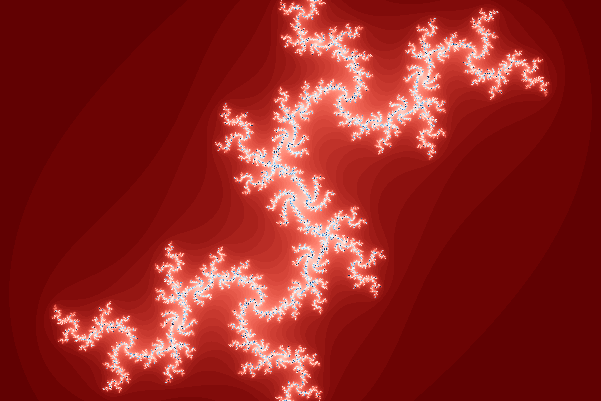

In [58]:
let I = -1:.005:1, R = -1.5:.005:1.5
    data = Array{RGB{N0f8}}(length(I), length(R))
    img = ImageMeta(data)
    @manipulate for i′ = 0.65:0.01:0.85, r′ = -0.1:0.01:0.1
        for (j, i) in enumerate(I),
            (k, r) in enumerate(R)
            data[j,k] = cmap[julia(r + i*im, r′ + i′*im)]
        end
        img
    end
end

Interact.Options{:SelectionSlider,Float64}(31: "input-11" = 0.75 Float64 , "i′", 0.75, "0.75", 11, Interact.OptionDict(DataStructures.OrderedDict("0.65"=>0.65,"0.66"=>0.66,"0.67"=>0.67,"0.68"=>0.68,"0.69"=>0.69,"0.7"=>0.7,"0.71"=>0.71,"0.72"=>0.72,"0.73"=>0.73,"0.74"=>0.74…), Dict(0.74=>"0.74",0.72=>"0.72",0.66=>"0.66",0.84=>"0.84",0.7=>"0.7",0.68=>"0.68",0.76=>"0.76",0.78=>"0.78",0.85=>"0.85",0.65=>"0.65"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(33: "input-12" = 0.0 Float64 , "r′", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-0.1"=>-0.1,"-0.09"=>-0.09,"-0.08"=>-0.08,"-0.07"=>-0.07,"-0.06"=>-0.06,"-0.05"=>-0.05,"-0.04"=>-0.04,"-0.03"=>-0.03,"-0.02"=>-0.02,"-0.01"=>-0.01…), Dict(0.04=>"0.04",-0.03=>"-0.03",0.09=>"0.09",0.08=>"0.08",0.0=>"0.0",-0.04=>"-0.04",-0.07=>"-0.07",0.01=>"0.01",0.07=>"0.07",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

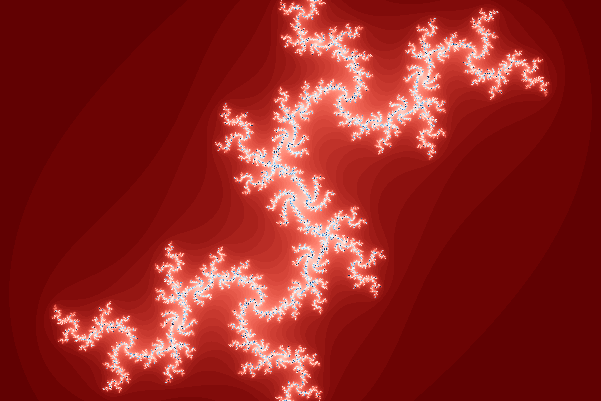

In [59]:
using Base.Threads

let I = -1:.005:1, R = -1.5:.005:1.5
    data = Array{RGB{N0f8}}(length(I), length(R))
    img = ImageMeta(data)
    @manipulate for i′ = 0.65:0.01:0.85, r′ = -0.1:0.01:0.1
        @threads for j = 1:length(I)
            i = I[j]
            for k = 1:length(R)
                r = R[k]
                data[j,k] = cmap[julia(r + i*im, r′ + i′*im)]
            end
        end
        img
    end
end

In [60]:
nthreads()

4